# Analyzing MNIST dataset using ML techniques
In this notebook, we will analyze the MNIST dataset using various machine learning techniques. The MNIST dataset consists of handwritten digit images, and our goal is to classify these images into their respective digit classes (0-9). We will use the following steps:

1. **Preparing Dataset**: Load the MNIST dataset, flatten the images, and standardize the dataset using MinMaxScaler.
2. **Visualizing Sample Images**: Display a grid of sample images from the training dataset along with their real labels.
3. **Preparing Models**: Initialize and train several machine learning models on the MNIST dataset, including Logistic Regression, Support Vector Machine (SVM), Decision Tree, XGBoost, and Multi-Layer Perceptron (MLP).
4. **Training and Evaluating Models**: Train the models on the training data and evaluate them on the test data to calculate various performance metrics such as accuracy, F1 score, recall, and precision.
5. **Visualizing Predictions**: Test sample images and show their predicted labels along with the images.
6. **Saving Models**: Save the trained models and the scaler to disk using the `joblib` library.
7. **Loading and Using Saved Models**: Load the saved models from disk and use them to predict the label of a real sample image.

In [1]:
import time
import os
import joblib

from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

# Preparing Dataset:
Loading the MNIST dataset, flattening the images, and standardizing the dataset using MinMaxScaler.

In [2]:
# Load the MNIST dataset from Keras
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images from 28x28 to 784
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Standardize the dataset using MinMaxScaler from sklearn
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (60000, 784)
Test set shape: (10000, 784)


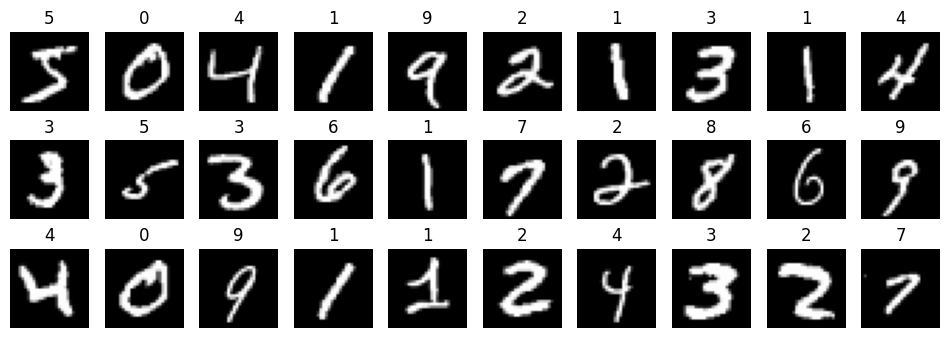

In [3]:
# Displays a grid of sample images from the training dataset along with their real labels.
r, c = 3, 10
fig, axes = plt.subplots(r, c, figsize=(12, 4))
axes = axes.ravel()

for i in range(r * c):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"{y_train[i]}")
    axes[i].axis('off')

plt.show()

# Preparing Models:
We will initialize and train several machine learning models on the MNIST dataset.
The models include:

- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree
- XGBoost
- Multi-Layer Perceptron (MLP)

Each model will be trained on the training data and evaluated on the test data to calculate various performance metrics such as accuracy, F1 score, recall, and precision.

In [4]:
# Initialize the models
models = {
    "LogisticRegression": LogisticRegression(max_iter=500,
                                             C=0.5),
    "SVM": SVC(C=1.5,
               kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10,
                                            min_samples_split=5),
    "XGBoost": XGBClassifier(eval_metric='mlogloss',
                             n_estimators=100,
                             learning_rate=0.1),
    "MLP": MLPClassifier(hidden_layer_sizes=(512, 128))}

For each model in the `models` dictionary, this code performs the following steps:
1. Prints the model name and separators for readability.
2. Records the start time.
3. Fits the model using the training data (`X_train`, `y_train`).
4. Predicts the labels for the test data (`X_test`).
5. Calculates the following metrics:
    - Accuracy
    - F1 Score (weighted)
    - Recall (weighted)
    - Precision (weighted)
6. Calculates the total training and testing time.
7. Prints the calculated metrics and the training/testing time.

In [5]:
# Train the models and calculate metrics
for name, model in models.items():
    print("="*50)
    print(f"Model: {name}")
    print("-"*15)
    
    start_time = time.time()
    model.fit(X_train, y_train, )

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    training_test_time = time.time() - start_time

    print(f"\tAccuracy: {accuracy:.2f}")
    print(f"\tF1 Score: {f1:.2f}")
    print(f"\tRecall: {recall:.2f}")
    print(f"\tPrecision: {precision:.2f}")
    print()
    print(f"Training & Test Time: {training_test_time:.2f} seconds")
    print("-"*15)
    print()

Model: LogisticRegression
---------------
	Accuracy: 0.93
	F1 Score: 0.93
	Recall: 0.93
	Precision: 0.93

Training & Test Time: 39.17 seconds
---------------

Model: SVM
---------------
	Accuracy: 0.98
	F1 Score: 0.98
	Recall: 0.98
	Precision: 0.98

Training & Test Time: 332.62 seconds
---------------

Model: Decision Tree
---------------
	Accuracy: 0.87
	F1 Score: 0.87
	Recall: 0.87
	Precision: 0.87

Training & Test Time: 17.43 seconds
---------------

Model: XGBoost
---------------
	Accuracy: 0.97
	F1 Score: 0.97
	Recall: 0.97
	Precision: 0.97

Training & Test Time: 247.18 seconds
---------------

Model: MLP
---------------
	Accuracy: 0.98
	F1 Score: 0.98
	Recall: 0.98
	Precision: 0.98

Training & Test Time: 359.09 seconds
---------------



This function tests a set number of sample images from the test dataset using 
multiple trained models, and displays the images along with their predicted 
labels in a grid format.

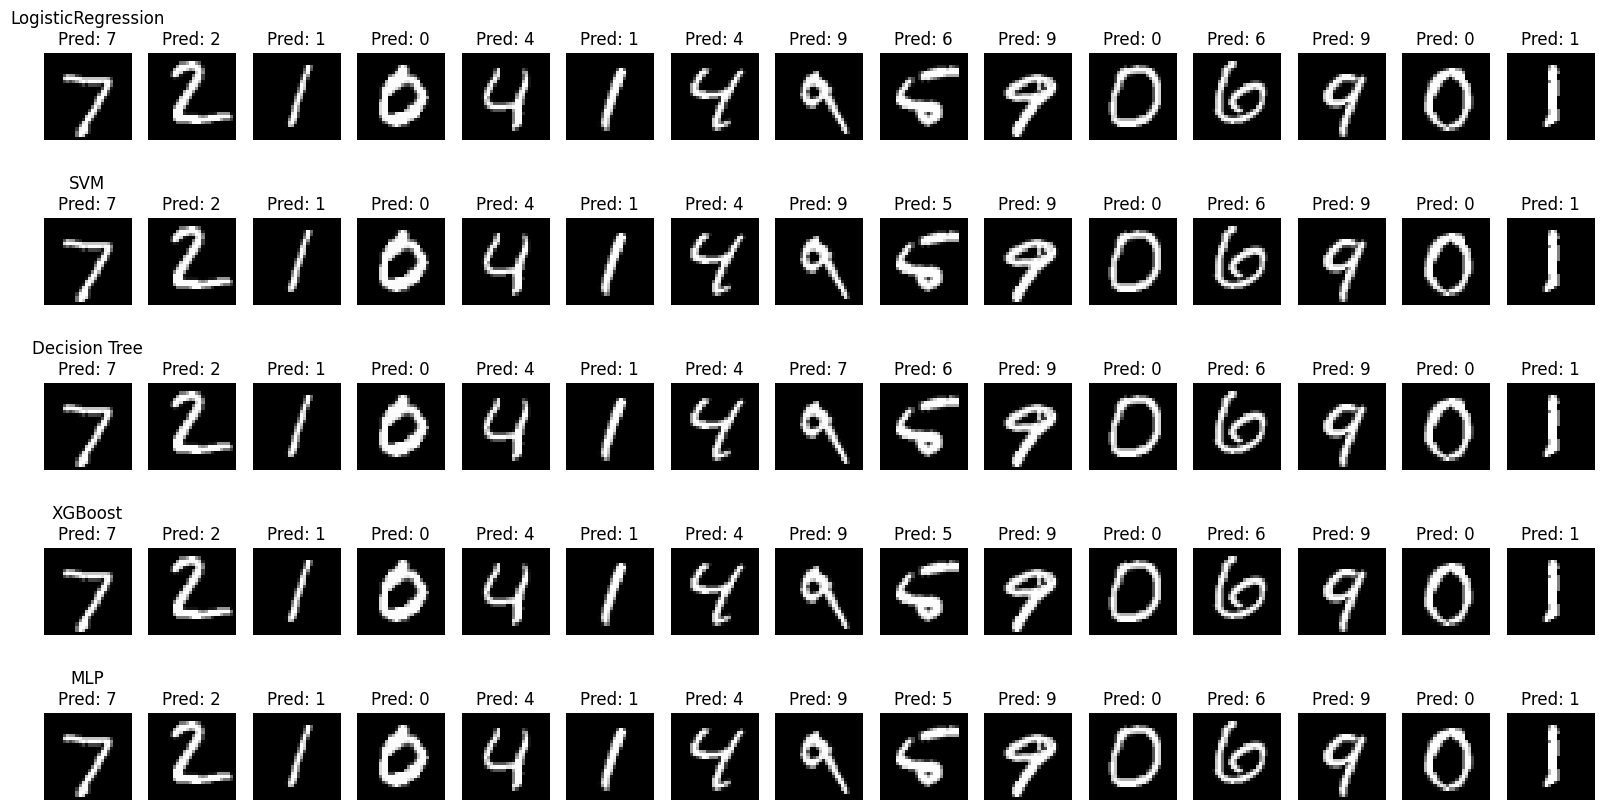

In [10]:
# Test sample images and show their predicted labels along with the images
num_test = 15
fig, axes = plt.subplots(len(models), num_test,
                         figsize=(20, 10))
axes = axes.ravel()

for model_idx, (name, model) in enumerate(models.items()):
    for i in range(num_test):
        sample_image = X_test[i].reshape(1, -1)
        true_label = y_test[i]
        predicted_label = model.predict(sample_image)[0]

        ax = axes[model_idx * num_test + i]
        ax.imshow(sample_image.reshape(28, 28), cmap='gray')
        if i==0:
            ax.set_title(f"{name}\nPred: {predicted_label}")
        else:
            ax.set_title(f"Pred: {predicted_label}")
        ax.axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()


# Saving Models:

The trained models and the scaler are saved to disk using the `joblib` library. This allows for easy reuse of the models and scaler without needing to retrain them. The models are saved with the filename format `{model_name}_model.pkl` and the scaler is saved as `scaler.pkl`.


In [7]:
# Save all models
for name, model in models.items():
    filename = f"{name}_model.pkl"
    joblib.dump(model, filename)
    print(f"Model {name} saved as {filename}")

# Save the scaler
scaler_filename = "scaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved as {scaler_filename}")

Model LogisticRegression saved as LogisticRegression_model.pkl
Model SVM saved as SVM_model.pkl
Model Decision Tree saved as Decision Tree_model.pkl
Model XGBoost saved as XGBoost_model.pkl
Model MLP saved as MLP_model.pkl
Scaler saved as scaler.pkl


In [15]:
# Load all models saved in the current directory
loaded_models = {}
for file in os.listdir('.\\'):
    if file.endswith("_model.pkl"):
        name = file.split("_")[0]    
        filename = f"{name}_model.pkl"
        loaded_models[name] = joblib.load(filename)
        print(f"Model: {name} loaded from: `{filename}`")

# Load the scaler saved in the current directory
scaler_filename = "scaler.pkl"
loaded_scaler = joblib.load(scaler_filename)
print(f"Scaler loaded from: `{scaler_filename}`")


Model: Decision Tree loaded from: `Decision Tree_model.pkl`
Model: LogisticRegression loaded from: `LogisticRegression_model.pkl`
Model: MLP loaded from: `MLP_model.pkl`
Model: SVM loaded from: `SVM_model.pkl`
Model: XGBoost loaded from: `XGBoost_model.pkl`
Scaler loaded from: `scaler.pkl`


# Use saved models to predict a real sample

The saved models are loaded from disk and used to predict the label of a real sample image. The image is preprocessed to match the format of the training data, and each model's prediction is displayed.

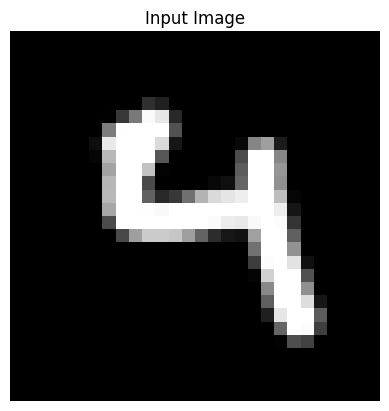

Model: Decision Tree, Predicted Label: 4
Model: LogisticRegression, Predicted Label: 4
Model: MLP, Predicted Label: 4
Model: SVM, Predicted Label: 4
Model: XGBoost, Predicted Label: 4


In [16]:
# Load an image and predict its label using each model
image_path = r'.\sample\4.png'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = ImageOps.invert(image)  # Invert the image
image = image.resize((28, 28))  # Resize to 28x28 pixels

# Show the image in a plot
plt.imshow(image, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

# Flatten the image and convert it to a numpy array
image_array = np.array(image).reshape(1, -1)

# Normalize the image using the loaded scaler
image_array = loaded_scaler.transform(image_array)

# Predict the label using each model and print the results
for name, model in loaded_models.items():
    predicted_label = model.predict(image_array)[0]
    print(f"Model: {name}, Predicted Label: {predicted_label}")